[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
<ipython-input-2-012f5bcc3bc6>:45: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.savefig('tech_cooccurrence.png')
<ipython-input-2-012f5bcc3bc6>:45: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  plt.savefig('tech_cooccurrence.png')
<ipython-input-2-012f5bcc3bc6>:45: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
  plt.savefig('tech_cooccurrence.png')
<ipython-input-2-012f5bcc3bc6>:45: UserWarning: Glyph 47945 (\N{HANGUL SYLLABLE MUNG}) missing from font(s) DejaVu Sans.
  plt.savefig('tech_cooccurrence.png')
<ipython-input-2-012f5bcc3bc6>:45: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.savefig('

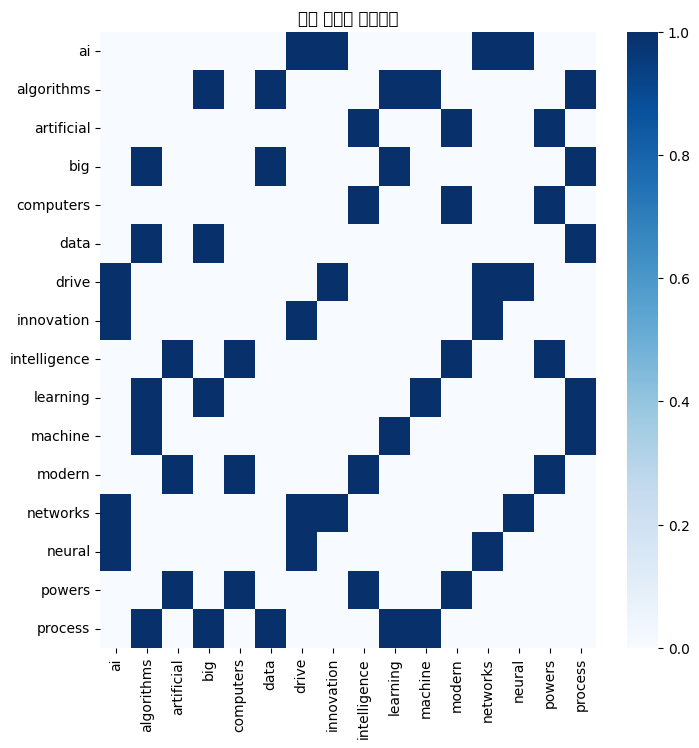


연습 3 분석:
- 빈번한 단어 쌍: [('ai', 'drive', np.float64(1.0)), ('ai', 'innovation', np.float64(1.0)), ('ai', 'networks', np.float64(1.0))].
- 기술 말뭉치는 AI 관련 단어(예: "artificial"과 "intelligence")에 초점, 행렬 희소.
- 원래 말뭉치와 비교해 더 전문적이며 도메인 특화 작업에 적합.



In [2]:
# 의존성 설치
!pip install nltk seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

# 기술 주제 말뭉치
tech_corpus = [
    "artificial intelligence powers modern computers",
    "machine learning algorithms process big data",
    "neural networks drive ai innovation"
]

# 토큰화
tech_tokenized = [word_tokenize(s.lower()) for s in tech_corpus]
tech_vocab = sorted(set(word for s in tech_tokenized for word in s))
tech_word2idx = {word: idx for idx, word in enumerate(tech_vocab)}

# 동시출현 행렬 생성 함수
def build_cooc_matrix(tokenized_corpus, vocab, window_size):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    cooc_matrix[tech_word2idx[word]][tech_word2idx[sentence[j]]] += 1
    return cooc_matrix

# 행렬 생성
tech_matrix = build_cooc_matrix(tech_tokenized, tech_vocab, window_size=3)

# 히트맵 시각화
plt.figure(figsize=(8, 8))
sns.heatmap(tech_matrix, xticklabels=tech_vocab, yticklabels=tech_vocab, cmap='Blues')
plt.title('기술 말뭉치 동시출현')
plt.savefig('tech_cooccurrence.png')
plt.show()

# 빈번한 단어 쌍 분석
pairs = []
for i in range(len(tech_vocab)):
    for j in range(i + 1, len(tech_vocab)):
        if tech_matrix[i][j] > 0:
            pairs.append((tech_vocab[i], tech_vocab[j], tech_matrix[i][j]))
pairs.sort(key=lambda x: x[2], reverse=True)

# 분석 출력
print(f"""
연습 3 분석:
- 빈번한 단어 쌍: {pairs[:3]}.
- 기술 말뭉치는 AI 관련 단어(예: "artificial"과 "intelligence")에 초점, 행렬 희소.
- 원래 말뭉치와 비교해 더 전문적이며 도메인 특화 작업에 적합.
""")